In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df=pd.read_csv('Wind_turbine_data.csv')

In [278]:
initial_entry=df.shape[0]

In [279]:
df.head()

,Unnamed: 0,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,01:40,6.87,-4.58,29.87,40.70,20.91,1.00,1.00,1.00,-0.25,577.47
2,20,1,1,03:20,6.57,-3.02,29.89,40.76,5.73,1.00,1.00,1.00,-0.27,619.05
3,30,1,1,05:00,9.40,-3.15,30.19,41.29,-1.83,1.00,1.00,1.00,-0.22,1179.60
4,40,1,1,06:40,12.81,-2.17,29.44,41.51,-23.73,1.07,1.07,1.07,-0.26,1539.55


In [280]:
del df['Unnamed: 0']

In [281]:
df.dropna(inplace=True) #Dropping all the NaN Values
Column_list=['Turbine_ID','Day','Time_Stamp','Wind_speed','Wind_direction','Temp_of_environment','Temperature_of_turbine','Nacelle direction',' Pitch angle of blade 1', 'Pitch angle of blade 2', 'Pitch angle of blade 3','Reactive power','Active power']
df.columns=Column_list # changing the column name for better understanding
final_entry=df.shape[0]
df.shape

(467562, 13)

In [282]:
data_lost_perc=(initial_entry-final_entry)/(initial_entry)*100
data_lost_perc
# Around 1% of data is lost in removing the Entries with NaN values which is acceptable

1.0978271905777235

In [283]:
df.head()

,Turbine_ID,Day,Time_Stamp,Wind_speed,Wind_direction,Temp_of_environment,Temperature_of_turbine,Nacelle direction,Pitch angle of blade 1,Pitch angle of blade 2,Pitch angle of blade 3,Reactive power,Active power
1,1,1,01:40,6.87,-4.58,29.87,40.70,20.91,1.00,1.00,1.00,-0.25,577.47
2,1,1,03:20,6.57,-3.02,29.89,40.76,5.73,1.00,1.00,1.00,-0.27,619.05
3,1,1,05:00,9.40,-3.15,30.19,41.29,-1.83,1.00,1.00,1.00,-0.22,1179.60
4,1,1,06:40,12.81,-2.17,29.44,41.51,-23.73,1.07,1.07,1.07,-0.26,1539.55
5,1,1,08:20,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77


In [284]:
#Description of the data an its attributes
desc=df.describe()
desc

,Turbine_ID,Day,Wind_speed,Wind_direction,Temp_of_environment,Temperature_of_turbine,Nacelle direction,Pitch angle of blade 1,Pitch angle of blade 2,Pitch angle of blade 3,Reactive power,Active power
count,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000,467562.000000
mean,67.482644,123.490900,5.032796,0.688080,41.115066,27.410588,188.570267,26.820706,26.804507,26.793653,-12.959092,350.123394
std,38.670021,70.760141,3.403607,31.598318,85.248200,18.229159,163.366111,38.807916,38.801052,38.794621,70.421340,424.718890
min,1.000000,1.000000,0.000000,-307.370000,-272.960000,-273.170000,-884.860000,-10.000000,-10.000000,-10.000000,-530.070000,-7.810000
25%,34.000000,62.000000,2.240000,-3.790000,14.040000,20.050000,62.800000,0.010000,0.010000,0.010000,-38.140000,-0.300000
50%,67.000000,124.000000,4.340000,-0.200000,25.740000,30.080000,194.760000,0.550000,0.550000,0.550000,-0.300000,178.960000
75%,101.000000,185.000000,7.020000,3.460000,32.737500,36.830000,322.080000,83.990000,83.980000,83.980000,0.000000,547.667500
max,134.000000,245.000000,24.720000,1454.680000,394.330000,261.240000,700.570000,99.980000,99.980000,94.630000,373.950000,1560.750000


In [285]:
#Dropping the unneccesary columns for better evaluatiion
df1=df.copy()

In [286]:
df1.head()

,Turbine_ID,Day,Time_Stamp,Wind_speed,Wind_direction,Temp_of_environment,Temperature_of_turbine,Nacelle direction,Pitch angle of blade 1,Pitch angle of blade 2,Pitch angle of blade 3,Reactive power,Active power
1,1,1,01:40,6.87,-4.58,29.87,40.70,20.91,1.00,1.00,1.00,-0.25,577.47
2,1,1,03:20,6.57,-3.02,29.89,40.76,5.73,1.00,1.00,1.00,-0.27,619.05
3,1,1,05:00,9.40,-3.15,30.19,41.29,-1.83,1.00,1.00,1.00,-0.22,1179.60
4,1,1,06:40,12.81,-2.17,29.44,41.51,-23.73,1.07,1.07,1.07,-0.26,1539.55
5,1,1,08:20,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77


In [287]:
del df1['Turbine_ID']
del df1['Time_Stamp']
del df1['Day']
df1.head()

,Wind_speed,Wind_direction,Temp_of_environment,Temperature_of_turbine,Nacelle direction,Pitch angle of blade 1,Pitch angle of blade 2,Pitch angle of blade 3,Reactive power,Active power
1,6.87,-4.58,29.87,40.70,20.91,1.00,1.00,1.00,-0.25,577.47
2,6.57,-3.02,29.89,40.76,5.73,1.00,1.00,1.00,-0.27,619.05
3,9.40,-3.15,30.19,41.29,-1.83,1.00,1.00,1.00,-0.22,1179.60
4,12.81,-2.17,29.44,41.51,-23.73,1.07,1.07,1.07,-0.26,1539.55
5,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77


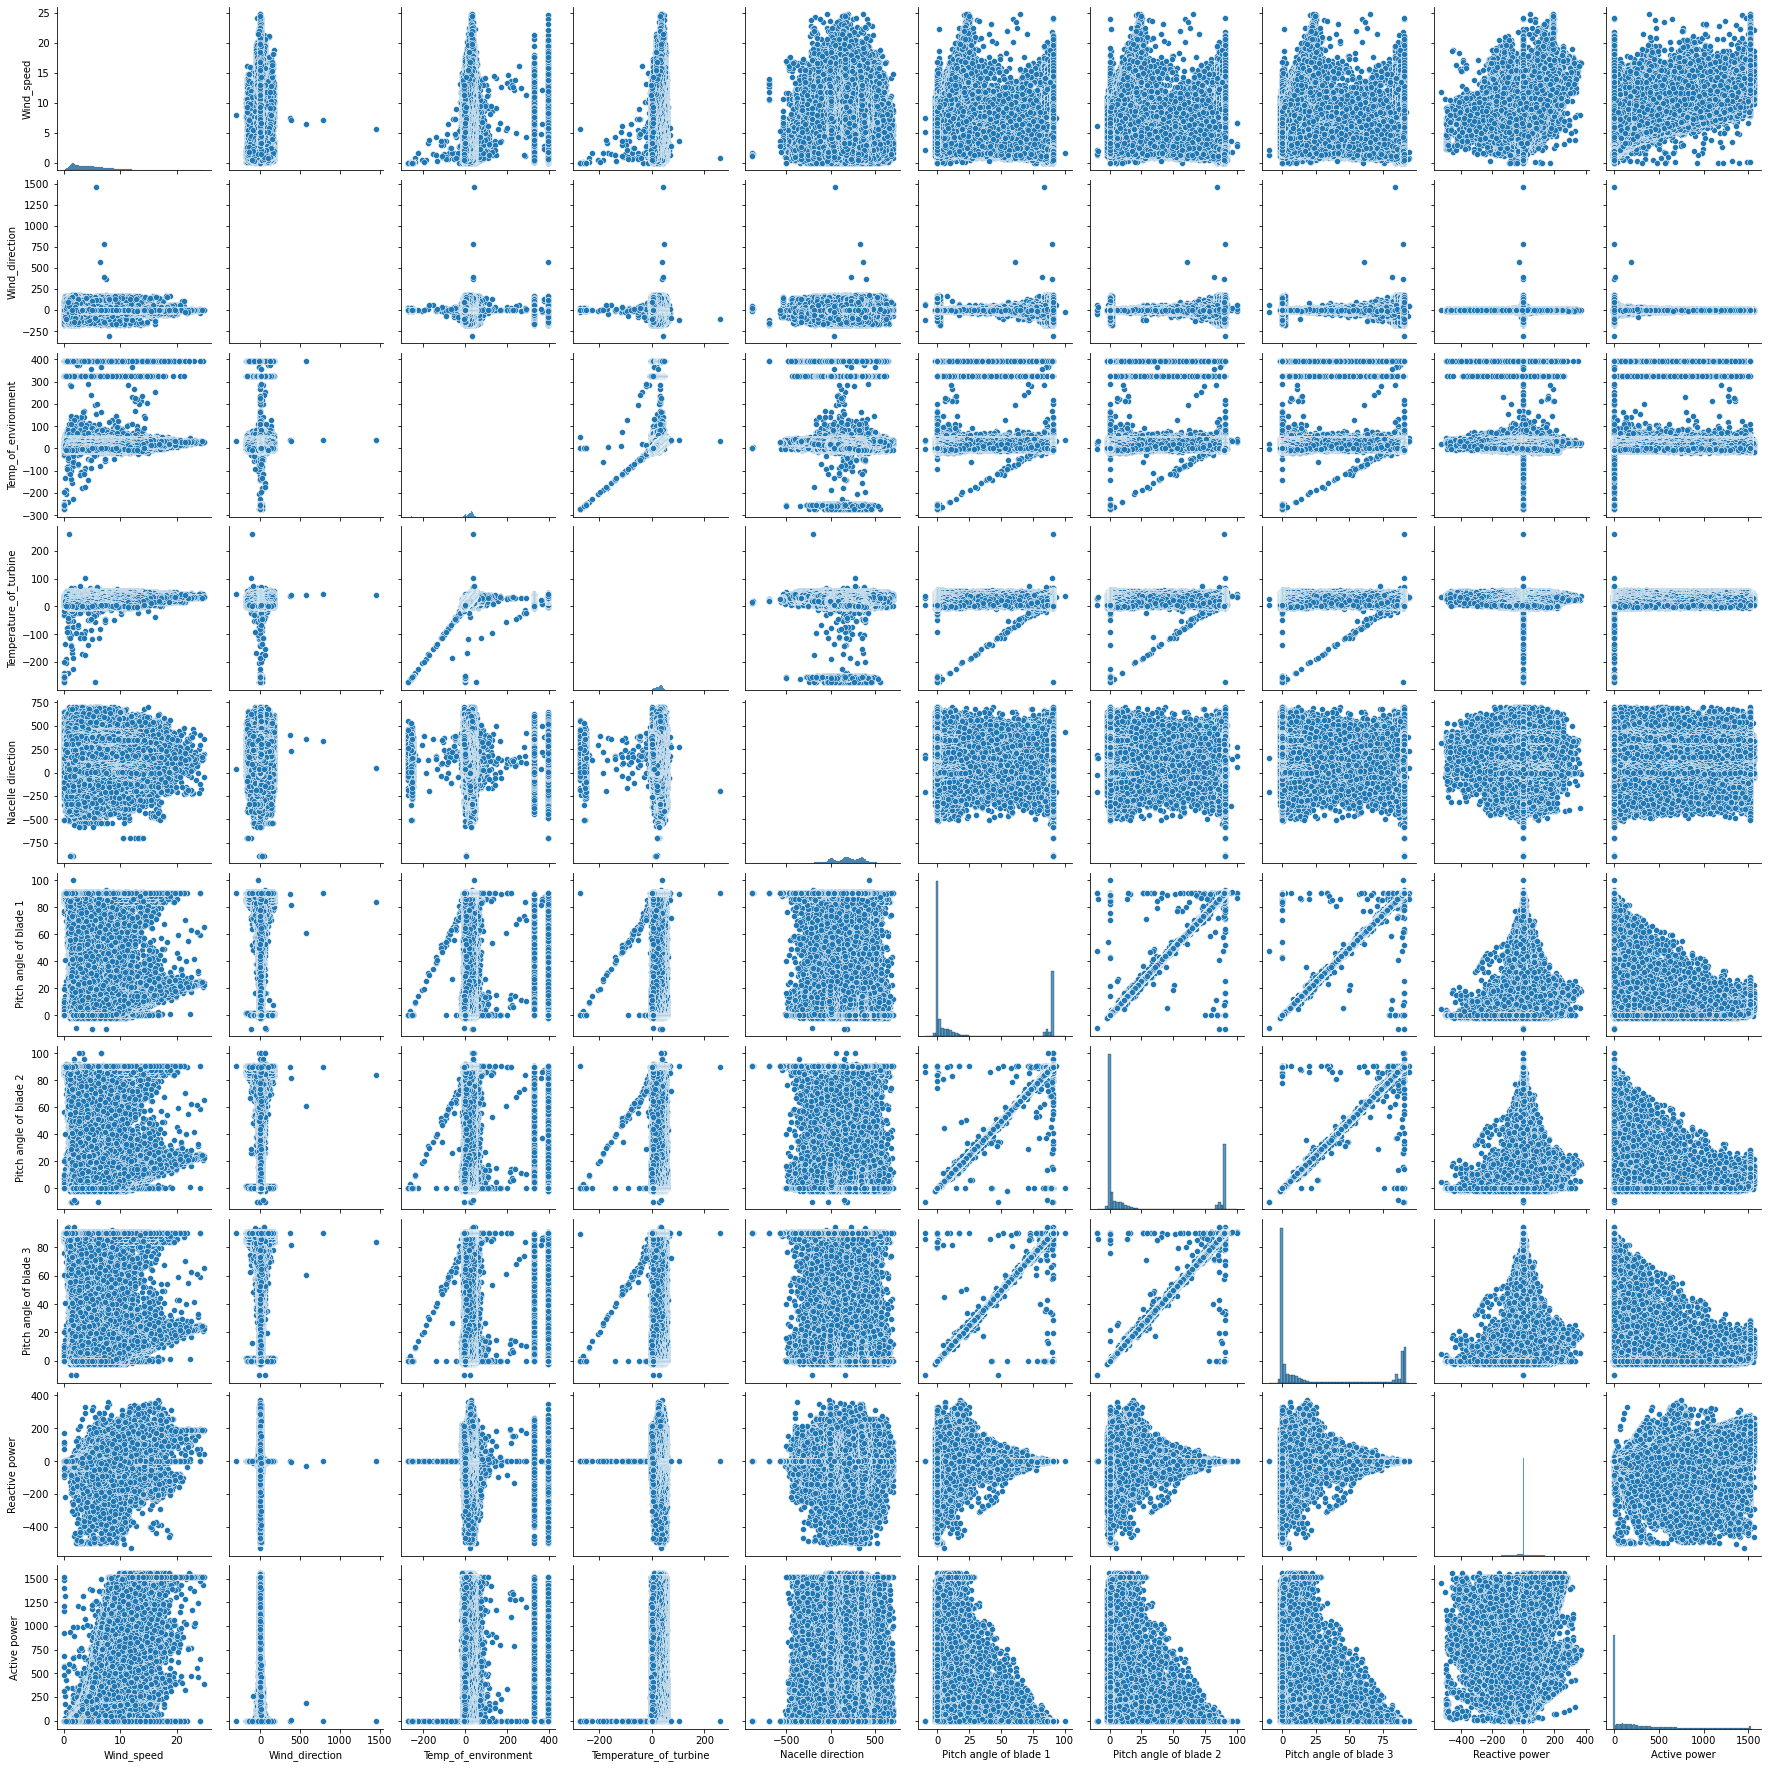

In [288]:
# Here we have a rough pairplot of our data 
#Since all of our attributes are independent of each other except our target which is active power
#Hence Not much can be deduced using pairplot
sns.pairplot(df1)

In [289]:
 Lets check the distribution of data
l=list(df1.columns)
for i in l:
    
    sns.distplot(df1[i],color='indianred')
    plt.show()

SyntaxError: invalid syntax (1783153590.py, line 1)

In [ ]:
 Lets plot scatter plots for correltion analysis with our target
for z in l:
    sns.scatterplot(data=df1,x=df1[z],y=df1['Active power'])
    plt.show()
    

In [ ]:
 From  the above plot we can make out a few correlation though it is still very vague we could see a few patterns generate 

In [ ]:
#from scada_data_analysis.modules.power_curve_preprocessing import PowerCurveFiltering
# Cant import powercurvefiltering s

In [ ]:
# As we can see there are few anomalies in the dataset where temperature going below -50 which is not possible in general we will try to drop those datasets
df1['Index']=range(df1.shape[0])
df1['index']=range(df1.shape[0])
df1=df1.set_index('Index')
df1.head()

In [ ]:
list1=[]
def preprocessing(i):
    if df1.loc[i,'Temp_of_environment'] <-50 or df1.loc[i,'Temperature_of_turbine']<-50 or df1.loc[i,'Temp_of_environment'] >60 or df1.loc[i,'Temperature_of_turbine'] >100: 
        list1.append(i)
        return 1
    else: return 0
    
list2=df1['index'].apply(preprocessing)
    

In [ ]:
len(list1)

In [ ]:
df1=df1.drop(list1)
del df1['index']

In [ ]:
df1.tail()

In [ ]:
df1['Index']=range(df1.shape[0])
df1=df1.set_index('Index')
df1.head()

In [ ]:
desc1=df1.describe()
desc1

In [ ]:
#list_drop=[]
#list_col=list(df1.columns)
#def preprocessing2(i,list_col1):
#    list_col=list(df1.columns)
#    max1=desc1.loc['mean',list_col1]+(2*desc1.loc['std',list_col1])
#    min1=desc1.loc['mean',list_col1]-(2*desc1.loc['std',list_col1])
#    if df1.loc[i,list_col1] > max1 or df1.loc[i,list_col1] < min1:
#        list_drop.append(i)
#       return 1
#    else:
#        return 0
#list_trash=preprocessing2(df1['index'],list_col)

In [ ]:
# Lets plot scatter plots for correltion analysis with our target
for z in l:
    sns.scatterplot(data=df1,x=df1[z],y=df1['Active power'])
    plt.show()

# Hence from the above plots after dropping a few outliers we couuld see a clearer picture 
# Wind speed is surely an increasing factor as its forming an incline pattern more refiniing is needed for a crisp plot
# Wind directions also affecting the active power  mostly we see the power genearetd only when the angle is zero
# Temperature of environment and temp of  turbine is not affecting the power in any was as deduced from the plot
# Pitch angle of the blades are making a declining slope aagainst the power hence lower the pitch angle more the power
# Reactive power is forming an ambiguous pattern of a dispersion plot more refinemnet is needed for deduction